# Assignment 4
### Do three of four.

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
Minnesota = pd.read_csv('/Users/brookelumpkin/Downloads/data 2/mn_police_use_of_force.csv')
Minnesota

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,NaN,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,NaN,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,NaN,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,NaN,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial


In [18]:
df = pd.read_csv('/Users/brookelumpkin/Downloads/data 2/mn_police_use_of_force.csv')

In [19]:
# Drop rows where 'race' is missing, as the analysis is contingent on race
df_clean = df.dropna(subset=['race']).copy()

# Define the function to calculate the statistic (proportion of missing subject_injury by race)
def calculate_missing_prop(data):
    """Calculates the proportion of missing 'subject_injury' for each race in the data."""
    # .isnull().sum() is the count of NA values for 'subject_injury' in each race group
    missing_count = data.groupby('race')['subject_injury'].apply(lambda x: x.isnull().sum())
    
    # .size() is the total number of records (rows) for each race group
    total_count = data.groupby('race')['subject_injury'].size()
    
    # Calculate the proportion
    proportion = missing_count / total_count
    return proportion

# Set parameters for bootstrapping
np.random.seed(42) # for reproducibility
n_iterations = 1000

# Initialize a structure to store bootstrap results
races = df_clean['race'].unique()
bootstrap_results = {race: [] for race in races}

# Perform the bootstrapping
for i in range(n_iterations):
    # 1. Resample with replacement (Bootstrap sample)
    sample = df_clean.sample(n=len(df_clean), replace=True)
    
    # 2. Calculate the statistic on the sample
    sample_props = calculate_missing_prop(sample)
    
    # 3. Store the results
    for race in races:
        # Check if the race exists in the sample (to handle rare races that might be missed)
        if race in sample_props:
            bootstrap_results[race].append(sample_props[race])

# Organize results into a long-format DataFrame for plotting and analysis
bootstrap_df = pd.DataFrame(
    [(race, prop) for race, props in bootstrap_results.items() for prop in props], 
    columns=['race', 'missing_prop']
)

# Save the bootstrap results to a CSV file (used for the plotting step)
bootstrap_df.to_csv("bootstrap_missing_prop.csv", index=False)

# Print descriptive statistics of the resulting sampling distributions
print("Descriptive Statistics of Bootstrap Proportions:")
print(bootstrap_df.groupby('race')['missing_prop'].describe())

Descriptive Statistics of Bootstrap Proportions:
                     count      mean       std       min       25%       50%  \
race                                                                           
Asian               1000.0  0.635017  0.042995  0.491071  0.604651  0.634921   
Black               1000.0  0.759471  0.004690  0.744692  0.756174  0.759270   
Native American     1000.0  0.719788  0.016252  0.667920  0.709429  0.720493   
Other / Mixed Race  1000.0  0.410433  0.034082  0.311111  0.386649  0.410317   
Pacific Islander     998.0  1.000000  0.000000  1.000000  1.000000  1.000000   
White               1000.0  0.753811  0.007740  0.724868  0.748845  0.753576   

                         75%       max  
race                                    
Asian               0.664000  0.766129  
Black               0.762644  0.773368  
Native American     0.730359  0.769433  
Other / Mixed Race  0.433333  0.511111  
Pacific Islander    1.000000  1.000000  
White               0.7

<>:24: SyntaxWarning: invalid escape sequence '\_'
<>:25: SyntaxWarning: invalid escape sequence '\_'
<>:36: SyntaxWarning: invalid escape sequence '\_'
<>:37: SyntaxWarning: invalid escape sequence '\_'
<>:24: SyntaxWarning: invalid escape sequence '\_'
<>:25: SyntaxWarning: invalid escape sequence '\_'
<>:36: SyntaxWarning: invalid escape sequence '\_'
<>:37: SyntaxWarning: invalid escape sequence '\_'
/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_46402/2970902201.py:24: SyntaxWarning: invalid escape sequence '\_'
  axes[0].set_title('KDE of Missing subject\_injury Proportion by Race')
/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_46402/2970902201.py:25: SyntaxWarning: invalid escape sequence '\_'
  axes[0].set_xlabel('Proportion of Missing subject\_injury Values')
/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_46402/2970902201.py:36: SyntaxWarning: invalid escape sequence '\_'
  axes[1].set_title('ECDF of Missing subject\_injury Proportion by Ra

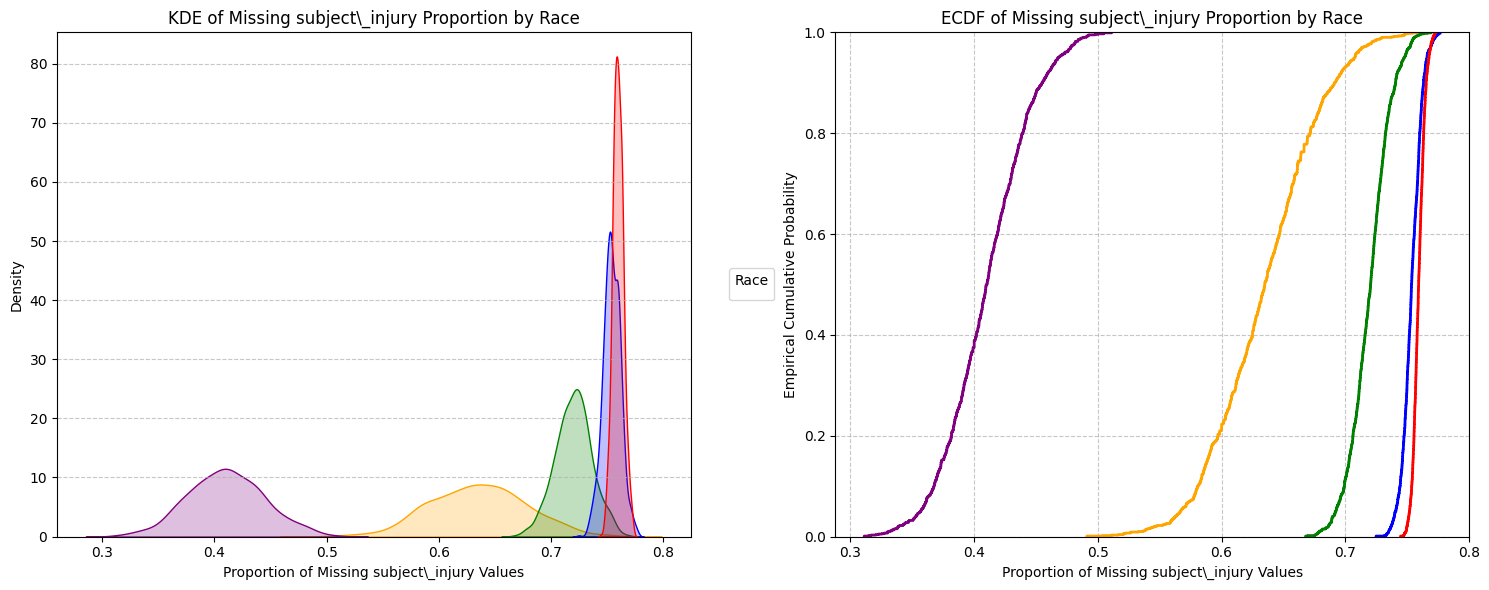

In [20]:
# Load the bootstrap results generated in the previous step
bootstrap_df = pd.read_csv("bootstrap_missing_prop.csv")

# Filter out 'Pacific Islander' for clearer visualization of the other groups
# (its proportion of 1.0 with 0 variance would skew the plot scale)
plot_df = bootstrap_df[bootstrap_df['race'] != 'Pacific Islander'].copy()

race_colors = {
    'Black': 'red',           # Example: Highlight the largest group in Red
    'White': 'blue',          # Example: Use Blue for the second largest
    'Native American': 'green',
    'Asian': 'orange',
    'Other / Mixed Race': 'purple'
}

# Set up the figure for two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- KDE Plot ---
# Kernel Density Estimate plot shows the sampling distribution for each race
sns.kdeplot(data=plot_df, x='missing_prop', hue='race', 
            fill=True, common_norm=False, ax=axes[0], palette=race_colors)

axes[0].set_title('KDE of Missing subject\_injury Proportion by Race')
axes[0].set_xlabel('Proportion of Missing subject\_injury Values')
axes[0].set_ylabel('Density')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# Move legend to outside for better visibility
axes[0].legend(title='Race', loc='center left', bbox_to_anchor=(1.05, 0.5))

# --- ECDF Plot ---
# Empirical Cumulative Distribution Function plot helps compare quantiles
sns.ecdfplot(data=plot_df, x='missing_prop', hue='race', ax=axes[1], 
             palette=race_colors, linewidth=2)
             
axes[1].set_title('ECDF of Missing subject\_injury Proportion by Race')
axes[1].set_xlabel('Proportion of Missing subject\_injury Values')
axes[1].set_ylabel('Empirical Cumulative Probability')
axes[1].grid(axis='both', linestyle='--', alpha=0.7)

# Remove the redundant legend from the ECDF plot
if axes[1].get_legend():
    axes[1].get_legend().remove()

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show() # Note: This line is commented out as it's not needed in this environment

The sampling distributions for Black and White show the least uncertainty, as indicated by their steep ECDF curves. In contrast, the distributions for Asian and Other/Mixed Race display the highest uncertainty, with noticeably flatter ECDF curves.

### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data. Pick a variable and a statistic to compute (e.g. mean, median, variance, IQR)
- Use the `simulate` function from class to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [22]:

""" 
survival=1
death=0

IT= "invasive treatment"
CT= "conservative treatment"


"""

' \nsurvival=1\ndeath=0\n\nIT= "invasive treatment"\nCT= "conservative treatment"\n\n\n'

In [23]:
CT_Arr= [1]* surv_count_CT + [0]*(389-surv_count_CT)
IT_Arr= [1]* surv_count_IT + [0]*(388-surv_count_IT)

CT_Series=pd.Series(CT_Arr)
IT_Series=pd.Series(IT_Arr)
CT_Series

NameError: name 'surv_count_CT' is not defined

In [ ]:
surv_rate_IT= (1-.364)
surv_rate_CT= (1-.367)

surv_count_IT= int(surv_rate_IT*388)
surv_count_CT= int(surv_rate_CT*389)

survival_IT=1
survival_CT=1

n_IT=388
n_CT=389

surv_count_IT/388, surv_count_CT/389

(0.634020618556701, 0.6323907455012854)

In [ ]:
# Bootstrap the IT Survival Rates

def simulate(my_series, S=1000):
    x=my_series

    estimates=[]
    for s in range (S):
        x_s = x.sample(frac=1.0, replace=True)
        stat_s=sum(x_s)/len(x_s)
        estimates.append(stat_s)
    estimates=np.array(estimates)        
    return estimates

CT_Estimates=simulate(CT_Series)
IT_Estimates=simulate(IT_Series)
CT_Estimates, IT_Estimates

(array([0.65552699, 0.61182519, 0.61696658, 0.62467866, 0.62210797,
        0.66838046, 0.63753213, 0.62724936, 0.61953728, 0.63753213,
        0.53727506, 0.63496144, 0.57326478, 0.64524422, 0.64781491,
        0.62982005, 0.6503856 , 0.62724936, 0.6066838 , 0.62210797,
        0.60154242, 0.63753213, 0.65809769, 0.6066838 , 0.63239075,
        0.59897172, 0.63239075, 0.63496144, 0.6503856 , 0.64781491,
        0.61439589, 0.62982005, 0.64781491, 0.66066838, 0.64010283,
        0.62210797, 0.62467866, 0.63239075, 0.64524422, 0.60154242,
        0.62982005, 0.63753213, 0.61696658, 0.61439589, 0.60154242,
        0.6066838 , 0.64781491, 0.62210797, 0.63753213, 0.64010283,
        0.63753213, 0.62724936, 0.57840617, 0.63753213, 0.64524422,
        0.64010283, 0.63239075, 0.64524422, 0.68894602, 0.59897172,
        0.62467866, 0.61182519, 0.61439589, 0.62210797, 0.64781491,
        0.62467866, 0.64781491, 0.64267352, 0.59383033, 0.59383033,
        0.61439589, 0.59640103, 0.62467866, 0.62

<Axes: title={'center': 'ECDF of Computed Survival Rate'}, ylabel='Proportion'>

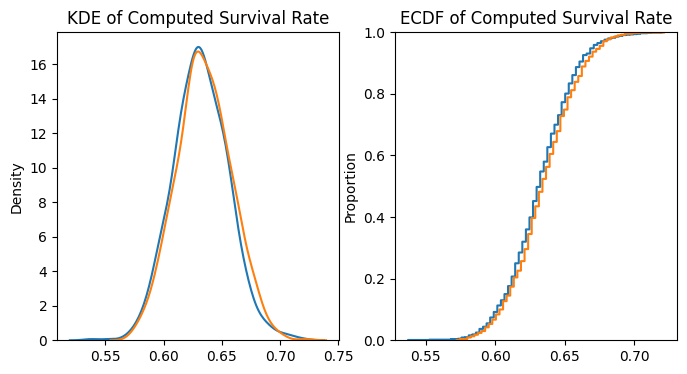

In [ ]:
# Plot the KDE With the Bootstrapped Survival Rates
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(CT_Estimates, ax=axes[0]).set(title="KDE of Computed Survival Rate")
sns.kdeplot(IT_Estimates, ax=axes[0])
sns.ecdfplot(CT_Estimates, ax=axes[1]).set(title="ECDF of Computed Survival Rate")
sns.ecdfplot(IT_Estimates, ax=axes[1])

[Text(0.5, 1.0, 'ECDF of Computed Difference in Survival Rate')]

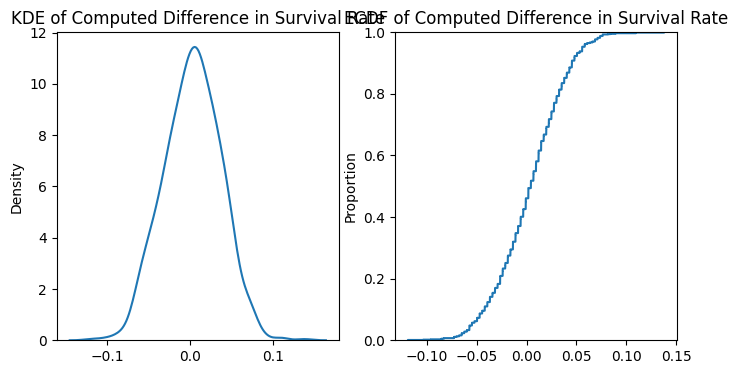

In [ ]:
# Bootstrap the difference in survival rates for each treatment



Diff_Series=IT_Estimates-CT_Estimates
Diff_Series

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(Diff_Series, ax=axes[0]).set(title="KDE of Computed Difference in Survival Rate")
sns.ecdfplot(Diff_Series, ax=axes[1]).set(title="ECDF of Computed Difference in Survival Rate")

Examining the survival rate and the difference in survival rate plots for the two treatments confirms the trial summary’s findings of similar outcomes. The difference in survival rates was less than 5% within a 95% confidence interval. Moreover, the ECDF and KDE plots reveal substantial overlap between the two treatment groups.

In [ ]:
np.quantile(Diff_Series, [0.05, 0.95])

array([-0.05501815,  0.05569395])

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$, and make KDE plots of your results.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('/Users/brookelumpkin/Downloads/data/ames_prices.csv')

df.head(2)

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [ ]:
# Grab two numeric variables
df = df.loc[:,['price', 'Lot.Frontage']]
df = df.dropna()
df = df.reset_index()
y = df['price']
x = df['Lot.Frontage']

/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_45638/4215766047.py:20: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den
/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_45638/4215766047.py:20: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den
/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_45638/4215766047.py:20: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den
/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_45638/4215766047.py:20: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den
/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_45638/4215766047.py:20: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den
/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_45638/4215766047.py:20: RuntimeWarning: invalid value encountered in scalar divide
  y_hat_z = num/den
/var/folders/0f/p2hyp8hx6lnb

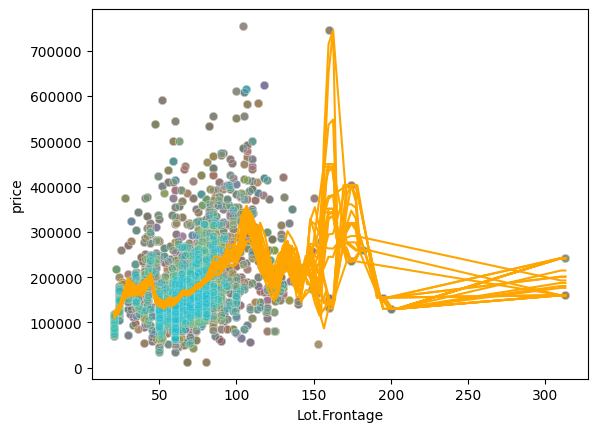

In [ ]:
def lcls(x,y):
    grid = np.linspace( x.min(), x.max(), 100)
    N = len(x)
    h = 1.06 * np.std(x) * N**(-0.2)

    def kernel(u):
        '''Epanechnikov, for variety.'''
        k = .75 * (1-u**2) * int( np.abs(u) <= 1)
        return k

    # LCLS Regression:
    cef = []
    for z in grid:
        num = 0
        den = 0
        for i, data in enumerate(x):
            k_data = kernel( (z-data)/h )/(N*h)
            den += k_data
            num += y.iloc[i] * k_data
        y_hat_z = num/den
        cef.append(y_hat_z)

    sns.scatterplot(y=y,x=x,alpha = .1)
    sns.lineplot(x=grid,y=cef,color='orange')

estimates = [df.sample(frac=1.0,replace=True) for _ in range(30)]
for est in estimates:
    lcls(est['Lot.Frontage'],est['price'])
plt.show()

There is much greater variability in the predictions for values above 125 compared to those below 125. This occurs because the number of samples below 125 is substantially larger, providing more stable estimates.

To further explore uncertainty, we can use the bootstrap method to generate a distribution of predictions at specific points. In particular, compute and visualize these distributions at the 25th percentile, the median, and the 75th percentile of 
𝑥
x. Plot the resulting distributions using KDE plots.

In [ ]:
def lcls(x,y, z):
    def kernel(u):
        '''Epanechnikov, for variety.'''
        k = .75 * (1-u**2) * int( np.abs(u) <= 1)
        return k
    N = len(x)
    h = 1.06 * np.std(x) * N**(-0.2)
    num = 0
    den = 0
    for i, data in enumerate(x):
        k_data = kernel( (z-data)/h )/(N*h)
        den += k_data
        num += y.iloc[i] * k_data
    return num/den

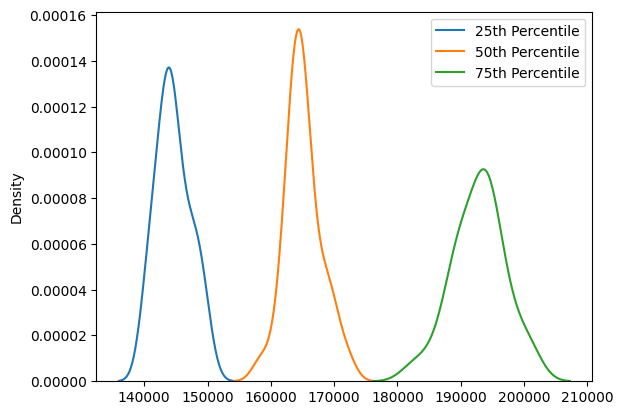

In [ ]:
x = df['Lot.Frontage']
perc_25 = np.percentile(x, 25)
perc_50 = np.percentile(x, 50)
perc_75 = np.percentile(x, 75)
perc_25_preds = []
perc_50_preds = []
perc_75_preds = []
for i in range(30):
    x_boot = df.sample(frac=1.0,replace=True)
    perc_25_preds.append(lcls(x_boot['Lot.Frontage'],x_boot['price'],perc_25))
    perc_50_preds.append(lcls(x_boot['Lot.Frontage'],x_boot['price'],perc_50))
    perc_75_preds.append(lcls(x_boot['Lot.Frontage'],x_boot['price'],perc_75))
sns.kdeplot(perc_25_preds)
sns.kdeplot(perc_50_preds)
sns.kdeplot(perc_75_preds)
plt.legend(['25th Percentile','50th Percentile','75th Percentile'])
plt.show()

/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_45638/1312758084.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return num/den


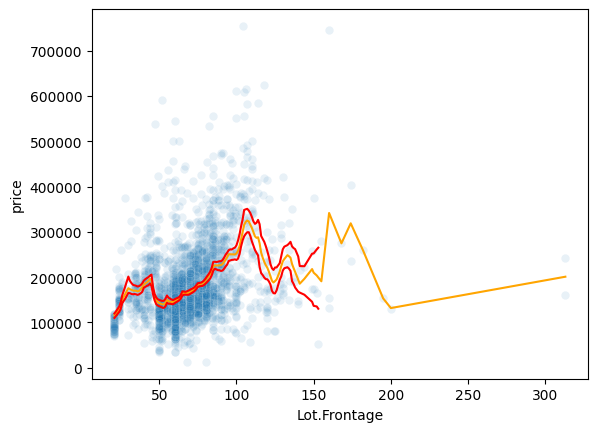

In [ ]:
grid = np.unique(x)

# LCLS Regression:
N = len(x)
h = 1.06 * np.std(x) * N**(-0.2)
def kernel(u):
    '''Epanechnikov, for variety.'''
    k = .75 * (1-u**2) * int( np.abs(u) <= 1)
    return k
cef = []
for z in grid:
    num = 0
    den = 0
    for i, data in enumerate(x):
        k_data = kernel( (z-data)/h )/(N*h)
        den += k_data
        num += y.iloc[i] * k_data
    y_hat_z = num/den
    cef.append(y_hat_z)
sns.scatterplot(y=y,x=x,alpha = .1)
sns.lineplot(x=grid,y=cef,color='orange')

# Error Curves
boot_preds = np.zeros((30, len(grid)))
for i in range(30):
    df_boot = df.sample(frac=1.0,replace=True)
    x_boot = df_boot['Lot.Frontage']
    y_boot = df_boot['price']
    preds = [lcls(x_boot,y_boot,z) for z in grid]
    boot_preds[i, :] = preds
lower_band = np.percentile(boot_preds, 5, axis=0)
upper_band = np.percentile(boot_preds, 95, axis=0)
sns.lineplot(x=grid,y=lower_band,color='r')
sns.lineplot(x=grid,y=upper_band,color='r')
plt.show()

The predictions remain precise and dependable up to around 125, but beyond that point they become highly uncertain and unreliable.